# IDG MicroBenchmark (CUDA)

Results from IDG microbenchmark (CUDA).

In [24]:
import os, sys
from pprint import pprint
from pathlib import Path


REPO_ROOT = str(Path(os.getcwd()).parent.parent.parent.parent)  # Repo root dir
REFRAME_ROOT = os.path.join(REPO_ROOT, 'reframe')  # ReFrame root dir
REFRAME_DEPS = os.path.join(REFRAME_ROOT, 'external')  # ReFrame dependencies
REPO_DEPS = os.path.join(REPO_ROOT, 'external')  # Repo dependencies
PERFLOG_DIR = os.path.join(REPO_ROOT, 'perflogs')  # Perflogs dir
sys.path.extend((REFRAME_ROOT, REPO_ROOT, REPO_DEPS, REFRAME_DEPS)) # the `modules` package imports `reframe` so need that in sys.modules

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import modules
import reframe
from reframe_config import site_configuration

# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import ScalarFormatter
from IPython.display import display, HTML

In [25]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

## Systems and their descriptions

The following table gives a high level overview of each partition defined in terms of architecture and configuration. The column `S:C:T` stands for **number of sockets**, **number of physical cores per socket** and **number of threads per core**. Similarly, the column `caches` indicate the cache sizes from lower to higher in bytes.

In [26]:
df = modules.utils.tabulate_partitions(root=PERFLOG_DIR)
display(HTML(df.transpose().to_html()))

## Defined benchmarks

This benchmark will run the currently most optimized Gridder and Degridder versions from the IDG microbenchmark in CUDA.

## Latest run performance metrics

All the performance metrics are tabulated from the latest benchmark run for different systems/parititons and programming environments

In [27]:
test = 'IdgMicro_Gridder'
df_g = modules.utils.tabulate_last_perf(test=test,
                                      root=PERFLOG_DIR,
                                      extras=[])#'layout'])
if df_g is None:
    print('%s: no performance logs found' % test)
else:
    df_g = df_g.transpose() # so now cols are all, single
    display(df_g)

perf_var                 FLOP/Byte   GB/s   GFLOP/s  GFLOP/s/W  Mvis/J  \
case                                                                     
generic:default:builtin     359.08  48.57  17441.78      85.69    2.42   

perf_var                 Mvis/s       W      ms  
case                                             
generic:default:builtin  491.89  203.55  102.01

In [28]:
test = 'IdgMicro_Degridder'
df_d = modules.utils.tabulate_last_perf(test=test,
                                      root=PERFLOG_DIR,
                                      extras=[])#['layout'])
if df_d is None:
    print('%s: no performance logs found' % test)
else:
    df_d = df_d.transpose() # so now cols are all, single
    display(df_d)

perf_var                 FLOP/Byte   GB/s   GFLOP/s  GFLOP/s/W  Mvis/J  \
case                                                                     
generic:default:builtin     359.08  39.89  14323.28      64.25    1.81   

perf_var                 Mvis/s       W      ms  
case                                             
generic:default:builtin  403.94  222.94  124.22

## Performance History

The plot shows the gridding throughput for each system/partition/environment combination. The performance logs include a git reference (as a tag "git=<ref>") to refer the state of repository when the test was performed.

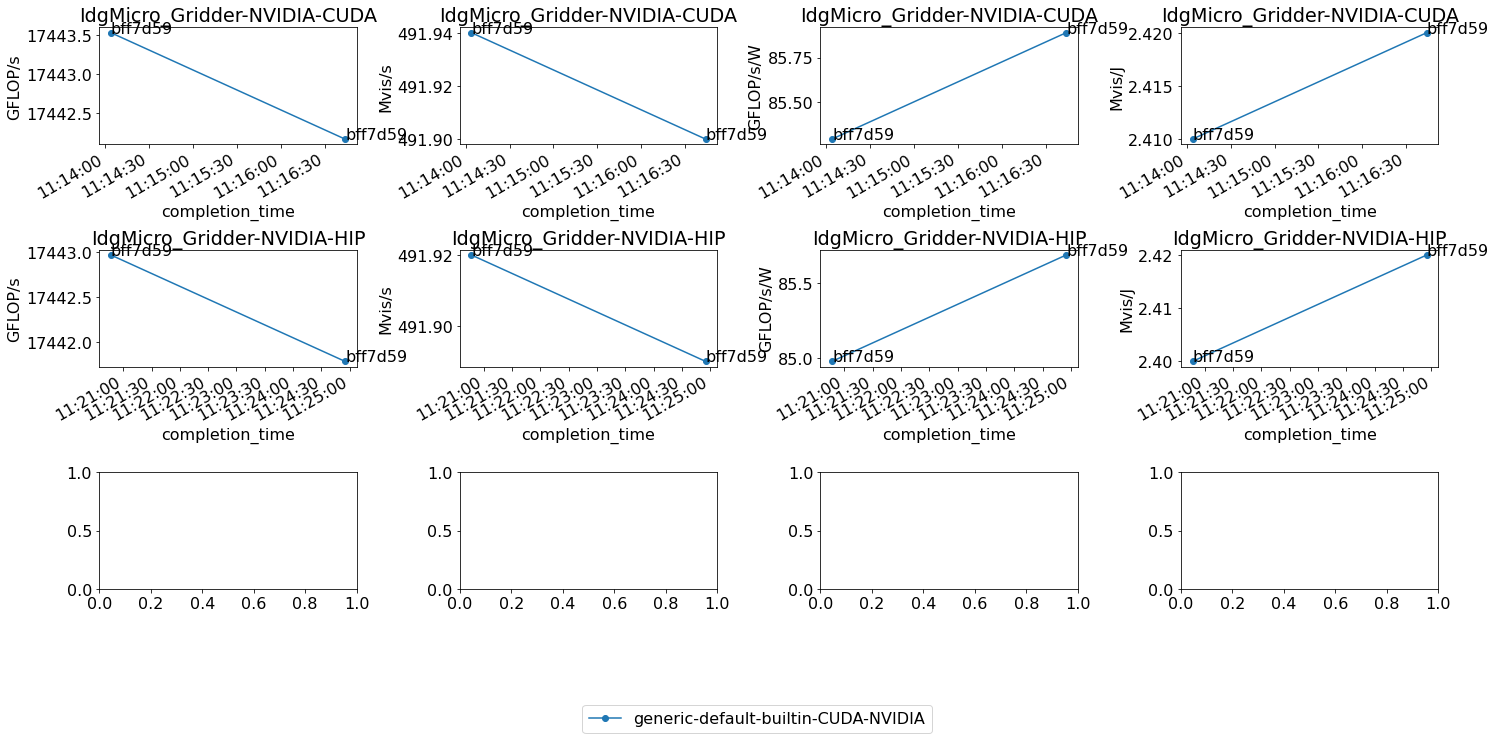

In [29]:
plt.rcParams.update({'font.size': 16})

test='IdgMicro_Gridder'
perf_records = modules.utils.load_perf_logs(root=PERFLOG_DIR, test=test)
if perf_records is None:
    print('%s: no performance logs found' % test)
else:
    fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(24, 10))
    plt.subplots_adjust(top = 0.98, bottom=0.01, hspace=0.9, wspace=0.4)
    ax=ax.flatten()
    counter=0
    for spe, data in perf_records.groupby(['sysname', 'partition', 'environ', 'Programming_Model', 'GPU_brand']):
        for iplot, perf_var in enumerate(['GFLOP/s', 'Mvis/s', 'GFLOP/s/W', 'Mvis/J']):
            df = data.loc[data['perf_var'] == perf_var]

            title = df['GPU_brand'].iat[0] + '-' + df['Programming_Model'].iat[0]
            df.plot(ax=ax[counter*4 + iplot], x='completion_time', y='perf_value', style=['o-'], label='-'.join(spe), legend=None)
            ax[counter*4 + iplot].set_title(test + '-' + title)
            ax[counter*4 + iplot].set_ylabel(perf_var)

            for x, y, ref in zip(df['completion_time'], df['perf_value'], df['git']):
                if not pd.isnull(ref):
                    ax[counter*4 + iplot].annotate(ref[:7], (x, y))
            ax[counter*4 + iplot].get_yaxis().get_major_formatter().set_useOffset(False)# to disable scientific notation

        counter+=1
                  
    handles, labels = ax[iplot].get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(0.4, 0.05), loc='upper left')
    

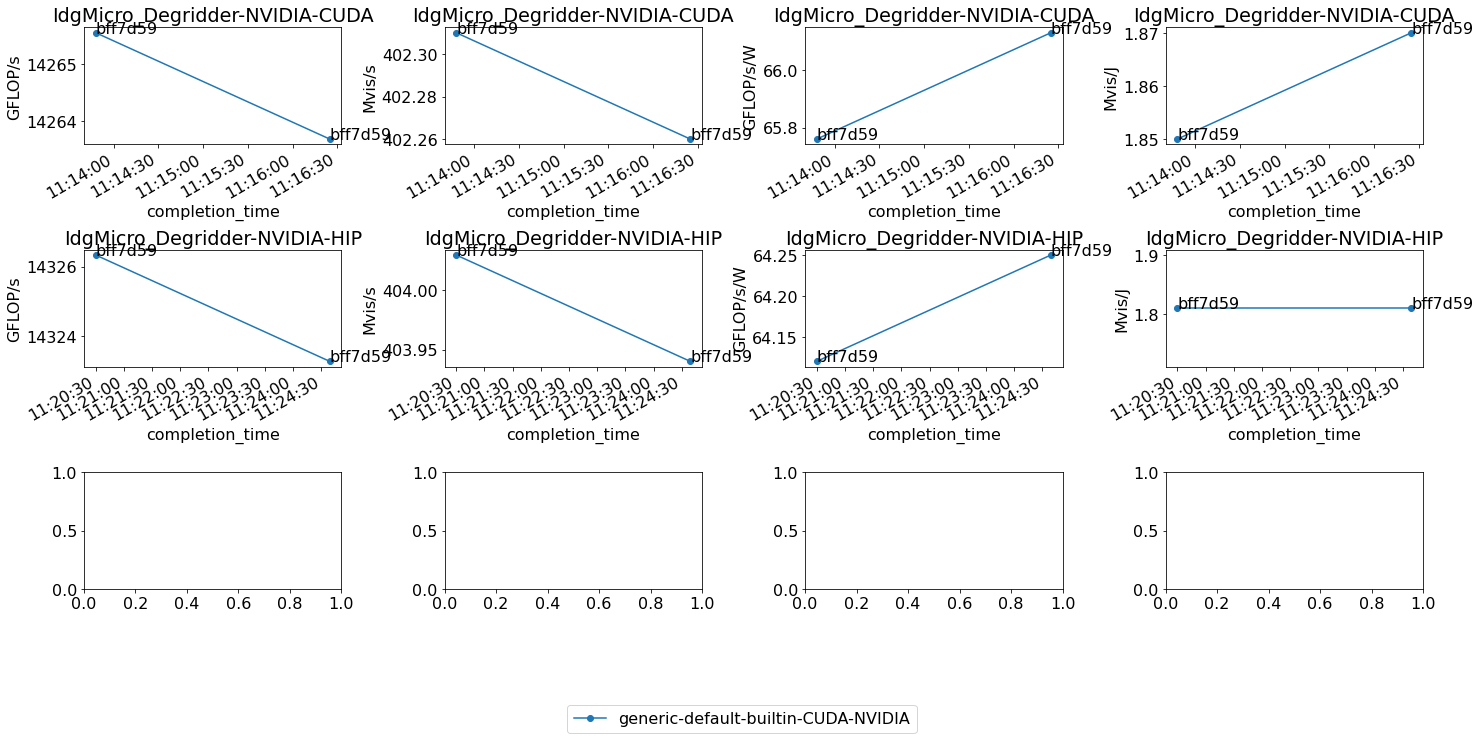

In [30]:
plt.rcParams.update({'font.size': 16})

test='IdgMicro_Degridder'
perf_records = modules.utils.load_perf_logs(root=PERFLOG_DIR, test=test)
if perf_records is None:
    print('%s: no performance logs found' % test)
else:
    fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(24, 10))
    plt.subplots_adjust(top = 0.98, bottom=0.01, hspace=0.9, wspace=0.4)
    ax=ax.flatten()
    counter=0
    for spe, data in perf_records.groupby(['sysname', 'partition', 'environ', 'Programming_Model', 'GPU_brand']):
        for iplot, perf_var in enumerate(['GFLOP/s', 'Mvis/s', 'GFLOP/s/W', 'Mvis/J']):
            df = data.loc[data['perf_var'] == perf_var]

            title = df['GPU_brand'].iat[0] + '-' + df['Programming_Model'].iat[0]
            df.plot(ax=ax[counter*4 + iplot], x='completion_time', y='perf_value', style=['o-'], label='-'.join(spe), legend=None)
            ax[counter*4 + iplot].set_title(test + '-' + title)
            ax[counter*4 + iplot].set_ylabel(perf_var)

            for x, y, ref in zip(df['completion_time'], df['perf_value'], df['git']):
                if not pd.isnull(ref):
                    ax[counter*4 + iplot].annotate(ref[:7], (x, y))
            ax[counter*4 + iplot].get_yaxis().get_major_formatter().set_useOffset(False)# to disable scientific notation

        counter+=1
                  
    handles, labels = ax[iplot].get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(0.4, 0.05), loc='upper left')
    